#Reinforcement Learning
- Reinforcement Learning is a branch of Machine Learning, also called Online Learning. 
- It is used to decide what action to take at time t+1 based on data up to time t. 
- This concept is used in Artificial Intelligence applications where the agent decides upon a series of moves depending on the state of the environment and the reward can be positive or negative depending on the perfomance of the agent.

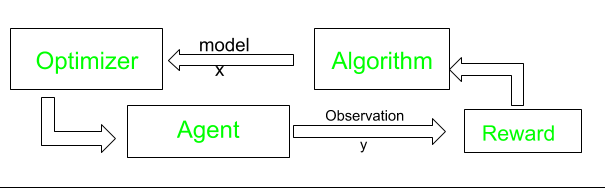

# Thompson Sampling
- Thompson Sampling (Posterior Sampling or Probability Matching) is a reinforcement learning algorithm for choosing the actions that address the exploration-exploitation dilemma in multi-armed bandit problem. 
- Actions are performed several times and are called exploration. 
- It uses training information that evaluates the actions taken rather than instructs by giving correct actions. This is what creates the need for active exploration, for an explicit trial-and-error search for good behaviour. 
- Based on the results of those actions, rewards (1) or penalties (0) are given for that action to the agent(machine).
- Further actions are performed in order to maximize the reward that may improve future performance.
- Thompson Sampling has an advantage of the tendency to decrease the search as we get more and more information, which mimics the desirable trade-off in the problem, where we want as much information as possible in fewer searches. - Hence, this Algorithm has a tendency to be more “search-oriented” when we have fewer data and less “search-oriented” when we have a lot of data.

- Applications Of Thompson Sampling: Thompson Sampling algorithm has been around for a long time. It has recently gained traction in many areas of Artificial Intelligence such as revenue management, marketing, web site optimisation, A/B testing, advertisement, recommendation system, gaming and more.

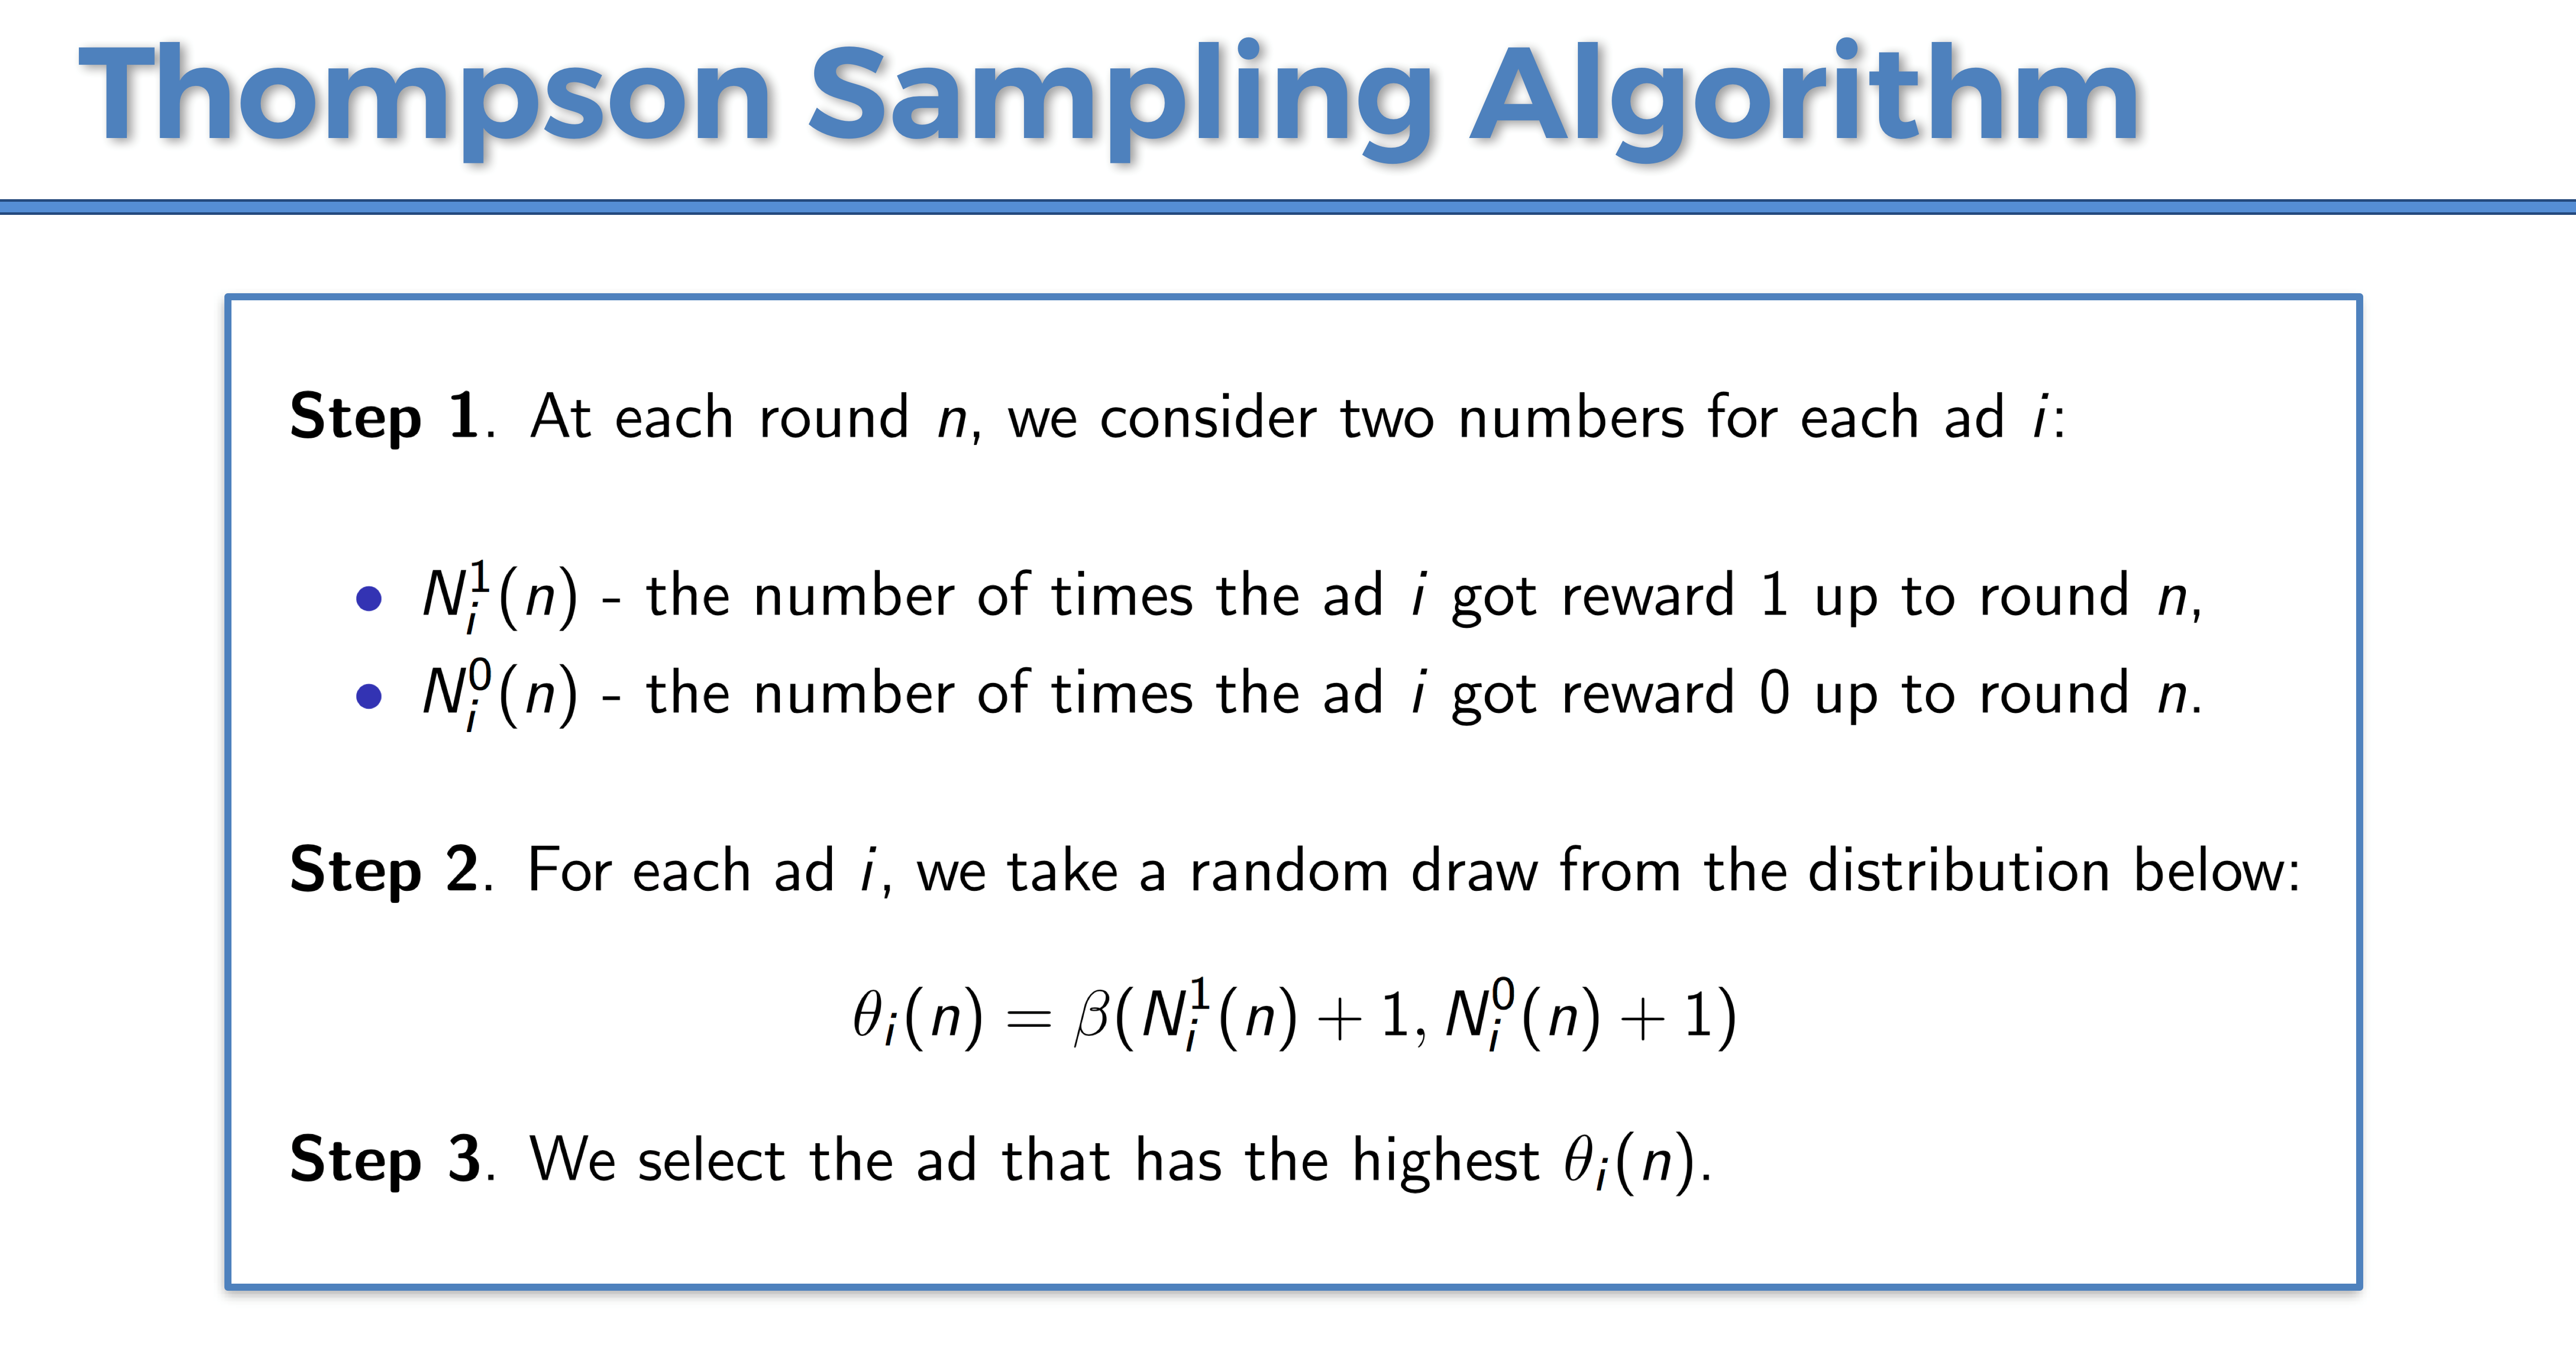

- Considering the Bernoulli bandit problem i.e the payout is either 1 or 0, to select the next arm to be pulled, Thompson sampling draws from the posterior predictive distributions of each choice using a random uniform variable. 
- This allows a non-optimal distribution to be sampled with varying frequency i.e as the posterior distribution becomes more certain, the probability of the choice being made decreases dynamically, thus Thompson sampling dynamically balances the desire for more information with making the currently optimal choice.


# Implementing Thomas Sampling

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
pd.options.display.show_dimensions = True
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Ads_CTR_Optimisation.csv to Ads_CTR_Optimisation.csv


In [7]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


1. Since we have to iterate through each observation of each of the ads, we start by initializing the number of observations and ads.

In [29]:
N = data.shape[0]  # number of observations
d = data.shape[1]  # number of features i.e ads

2. Each ad is selected based on the beta distribution of rewards and penalties associated with it so we create a list to save the machine that has been selected by Thompson Sampling for a specific round/observation.

In [30]:
ads_selected = []

3. We now initialize 3 variables: 
- one to store the rewards or 1’s received by each ad that was selected by the Thompson Sampling algorithm,
- one to store the penalties or 0’s received by each ad that was selected by the Thompson Sampling algorithm,
- and one to store the total number of rewards obtained using the Thompson Sampling algorithm.

N/B: Each variables is initialized with zero as we do not know prior to the algorithm.

In [31]:
positive_rewards = [0] * d
negative_rewards = [0] * d

total_rewards = 0

4. Thompson Sampling

In [34]:
# For each observation ‘n’, we start with ad[0] and a default maximum random beta distribution of zero
for n in range(0, N):
    ad = 0
    max_random = 0

    # For each observation, we iterate through each ad and select the ad with the highest random beta distribution.
    for i in range(0, d):
        random_beta = random.betavariate(positive_rewards[i] + 1, negative_rewards[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    # Update the ‘ad_selected’ list with the ad selected by the Thompson Sampling.        
    ads_selected.append(ad)


    # Once ad is selected, we check the data for that specific ad and the number of observations.
    # If it returned a reward, we update the ‘rewards’ list by adding one.
    # if it returned a penalty we update the ‘penalties’ list by adding one.
    # We then update the total rewards.
    reward = data.values[n, ad]
    if reward == 1:
        positive_rewards[ad] = positive_rewards[ad] + 1
    else:
        negative_rewards[ad] = negative_rewards[ad] + 1
    
    total_rewards = total_rewards + reward

5. Visualizing the Results

In [35]:
print(f'Rewards By Machine = {positive_rewards}')
print(f'Total Rewards = {total_rewards}')
print(f'Ad Selected At Each Round By Thompson Sampling : {ads_selected}')

Rewards By Machine = [16, 28, 3, 7, 5102, 0, 13, 87, 5, 1]
Total Rewards = 7937
Ad Selected At Each Round By Thompson Sampling : [4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

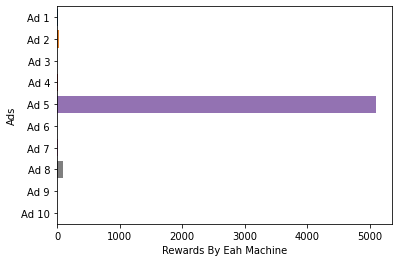

In [40]:
#Visualizing the rewards of each machine
sns.barplot(y=data.columns, x=positive_rewards, orient='h')
plt.xlabel('Rewards By Eah Machine')
plt.ylabel('Ads')
plt.show()

In [41]:
# Number Of Times Each Machine Was Selected
from collections import Counter
print(f'Number Of Times Each Machine Was Selected By The Thompson Sampling Algorithm : {dict(Counter(ads_selected))}')

Number Of Times Each Machine Was Selected By The Thompson Sampling Algorithm : {4: 28803, 1: 220, 3: 99, 8: 56, 7: 478, 6: 99, 0: 117, 2: 56, 5: 31, 9: 41}


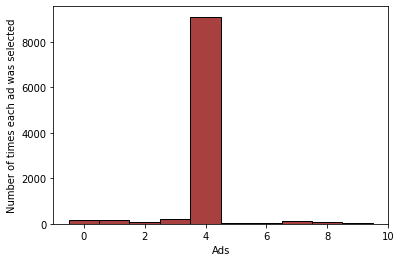

In [28]:
sns.histplot(ads_selected, discrete=True, color='darkred' )
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()